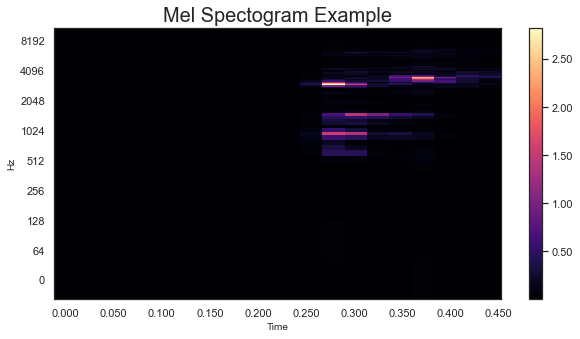

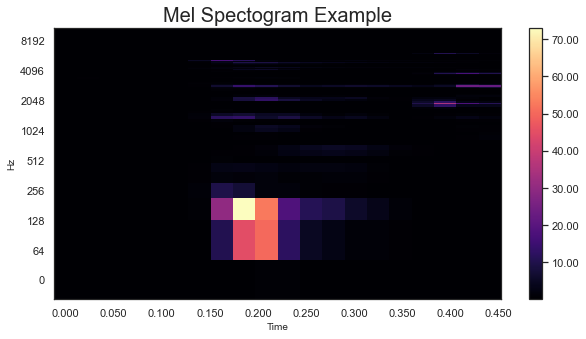

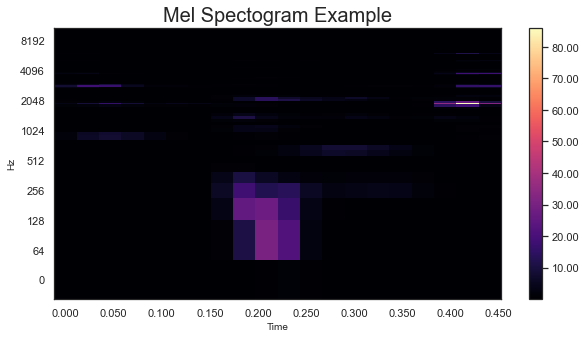

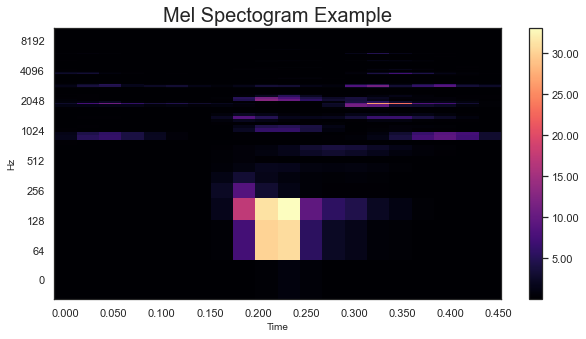

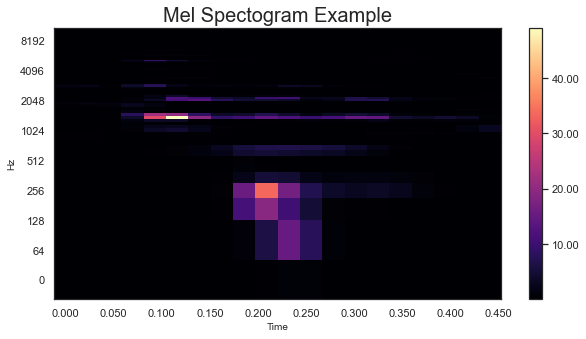

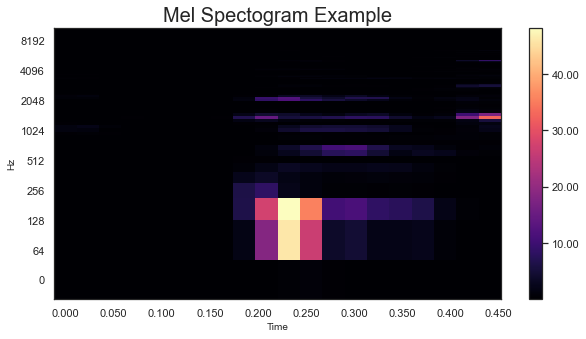

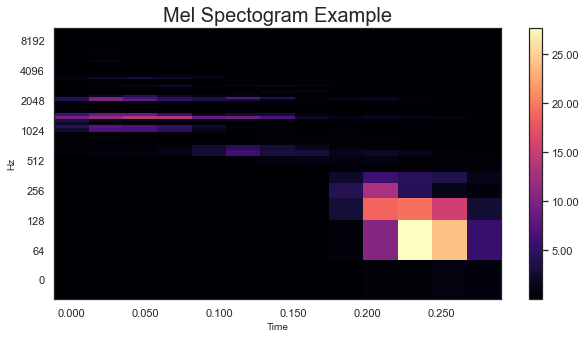

In [1]:
import audioUtils as u

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

from glob import glob

import librosa
import librosa.display
import IPython.display as ipd

from itertools import cycle

import librosa

sns.set(style="white", palette=None)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
color_cycle = cycle(plt.rcParams["axes.prop_cycle"].by_key()["color"])

file_path = 'sampleaudio.wav'
y,sr = librosa.load(file_path,sr=22050)

def plot(input):
    fig, ax = plt.subplots(figsize=(10, 5))
    # Plot the mel spectogram
    img = librosa.display.specshow(input,
                                x_axis='time',
                                y_axis='log',
                                ax=ax)
    ax.set_title('Mel Spectogram Example', fontsize=20)
    fig.colorbar(img, ax=ax, format=f'%0.2f')
    plt.show()

preAudio = u.preprocessAudio(file_path)
for i in preAudio:
    plot(i)





training\owl
sampleaudio.wav


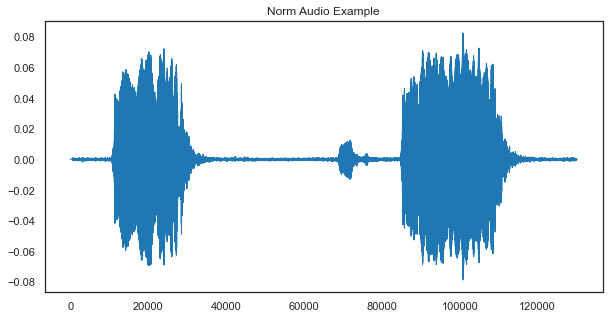

C:\Users\Dariu\AppData\Roaming\Python\Python38\site-packages\librosa\core\spectrum.py:256: UserWarning: n_fft=2048 is too large for input signal of length=176
  warnings.warn(


training\seagull
sampleaudio.wav


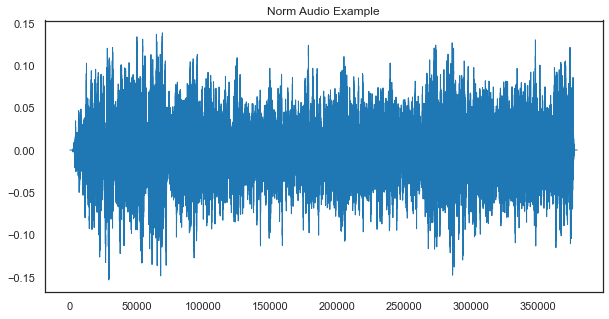

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


In [8]:
# all tracks will be the X features and genre will be the target y
all_tracks = []
genre = []
def plot(input):
    fig, ax = plt.subplots(figsize=(10, 5))
    # Plot the mel spectogram
    img = librosa.display.specshow(input,
                                x_axis='time',
                                y_axis='log',
                                ax=ax)
    ax.set_title('Mel Spectogram Example', fontsize=20)
    fig.colorbar(img, ax=ax, format=f'%0.2f')
    plt.show()

import os
# assign directory
directory = 'training'
 
# iterate over files in
# that directory
nameIndex = []

i = 0
for foldername in os.listdir(directory):
   folder_path = os.path.join(directory, foldername)
   print(folder_path)
   # checking if it is a file
   #  if os.path.isfile(f):
   for file in os.listdir(folder_path):
      fild_path = os.path.join(folder_path, file)
      y,sr = librosa.load(fild_path,sr=22050)
      song_pieces = u.cut_song(y)
      print(file_path)
      pd.Series(y).plot(figsize=(10, 5),
                  lw=1,
                  title='Norm Audio Example',
                 color=color_pal[0])
      plt.show()
      audio_piece = u.preprocessAudio(fild_path)
      # for i in audio_piece:
      #    plot(i)
      all_tracks += audio_piece
      genre += ([i]*len(audio_piece))
   i += 1

print(genre)




In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(128, 196, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))


model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1))

model.summary()

In [ ]:
from tensorflow.keras.optimizers import RMSprop
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics='accuracy')

history = model.fit(X_train, y_train, epochs=10, 
                    validation_data=(X_val, y_val))

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(X_test,  y_test, verbose=2)

https://towardsdatascience.com/machine-learning-on-sound-and-audio-data-3ae03bcf5095
https://www.youtube.com/watch?v=GxBG4wUWf4w